## Assigments 3.1

This first part of the assignment requires to implement yourself basic cross-validation strategies.

**Exercise 1.** Define a 10-fold classification strategy to test the accuracy of a Linear Discriminant Analysis (LDA) classifier for the data created as follows:

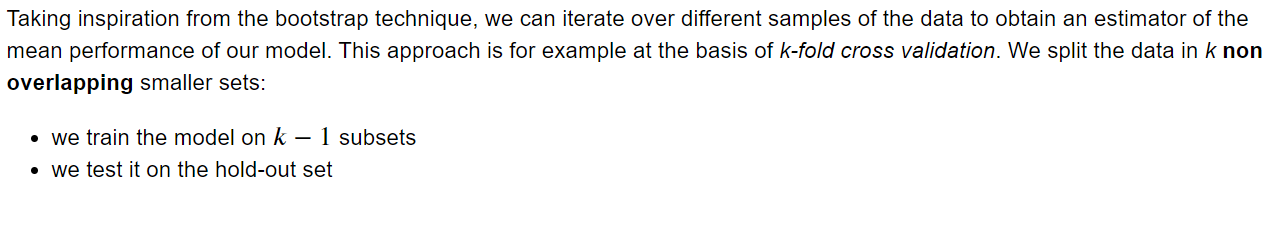
### k=10

In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2, n_redundant=0, n_informative=2, \
                           random_state=0, n_clusters_per_class=1, weights = [0.5])


In [3]:
print(X[0:10])

[[-0.6054158   1.29670808]
 [ 1.35489986 -0.04687748]
 [ 1.78037474  1.09985786]
 [ 1.43661465  0.80764063]
 [ 0.7216695   1.16816014]
 [ 2.73389996 -2.13650855]
 [ 2.43299453 -1.48718544]
 [ 2.03583055  1.02678775]
 [ 1.27186707 -1.50514147]
 [ 0.92995032  1.10563412]]


In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
model = LinearDiscriminantAnalysis()
np.random.seed(2123)

data_idx = np.arange(X.shape[0])

# Shuffling the data
#### Mode 1
# shuffling the data indices
np.random.shuffle(data_idx)
# getting data and labels at shuffled indices
X_shuffled = X[data_idx, :]
y_shuffled = y[data_idx]

In [5]:
k = 10  # 10 - fold cross validation

fold_size = np.floor(X_shuffled.shape[0] / k)

print("The fold size is:", fold_size)

training_acc = []
testing_acc = []

for i in range(k):
    # We compute the index where the testing data starts
    begin = int(i * fold_size)
    # We compute the index where the testing data stops
    end = int((i + 1) * fold_size)
    print(begin, end)

    # We extract the testing data in the range [begin, start]
    testing_data = X_shuffled[begin:end, :]
    # We extract the testing labels in the range [begin, start]
    testing_labels = y_shuffled[begin:end]

    # We compute the training indices as the remaining idices of
    # our data when we remove the testing ones
    training_indices = np.setdiff1d(
        range(X_shuffled.shape[0]), range(begin, end), assume_unique=True
    )

    # We extract the testing data in the range [begin, start]
    training_data = X_shuffled[training_indices, :]
    # We extract the testing labels in the range [begin, start]
    training_labels = y_shuffled[training_indices]

    # We train the model on the training data
    model.fit(training_data, training_labels)

    # We compute the accuracy in the training data
    training_acc.append(model.score(training_data, training_labels))
    # We compute the accuracy in the testing data
    testing_acc.append(model.score(testing_data, testing_labels))

print(training_acc)
print(testing_acc)

print("Average training accuracy", np.mean(training_acc))
print("SD training accuracy", np.std(training_acc))
print("Average testing accuracy", np.mean(testing_acc))
print("SD testing accuracy", np.std(testing_acc))

The fold size is: 10.0
0 10
10 20
20 30
30 40
40 50
50 60
60 70
70 80
80 90
90 100
[0.9333333333333333, 0.9777777777777777, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333]
[1.0, 0.6, 1.0, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average training accuracy 0.9400000000000001
SD training accuracy 0.014229164972072987
Average testing accuracy 0.9400000000000001
SD testing accuracy 0.12806248474865697


``The values provided are measures of the accuracy of a model on a training and testing dataset. (without implemented function a 10 - fold cross validation)``

The "average training accuracy" of 0.9400000000000001 indicates that, on average, the model correctly predicted the class labels of 94% of the instances in the training dataset.

The "SD training accuracy" of 0.014229164972072987 represents the standard deviation of the training accuracy scores across different iterations or folds of the cross-validation process. A lower SD indicates that the accuracy scores were more consistent across the different folds.

The "average testing accuracy" of 0.9400000000000001 indicates that the model correctly predicted the class labels of 94% of the instances in the testing dataset, on average.

The "SD testing accuracy" of 0.12806248474865697 represents the standard deviation of the testing accuracy scores across different iterations or folds of the cross-validation process. A higher SD indicates that the accuracy scores were more variable across the different folds.

In [5]:
from sklearn.model_selection import cross_val_score

sklearn_accuracy = cross_val_score(
    model, X, y, scoring="accuracy", cv=10
)

print(
    "The accuracy from "
    + str(k)
    + "-fold cross validation is: \n"
    + str(sklearn_accuracy)
)

print(
    "The average accuracy from "
    + str(k)
    + "-fold cross validation is: "
    + str(np.mean(sklearn_accuracy))
)

The accuracy from 10-fold cross validation is: 
[0.9 1.  1.  0.9 1.  1.  1.  1.  0.9 0.7]
The average accuracy from 10-fold cross validation is: 0.9399999999999998


The model achieved high accuracy in most of the folds, with values ranging from 0.7 to 1.0.
The lowest accuracy value was 0.7, which may indicate that the model is less effective in predicting certain instances in the dataset.
The average accuracy of the model across all 10 folds is 0.94, which suggests that the model is generally performing well on the dataset.

__Exercise 2.__ Use the previous 10-fold cross-validation to plot and compute the average area under the curve of the LDA classifier. You can use the built in method *predict_proba(X)*

What is the area under the curve of the LDA Classifier?

The area under the curve (AUC) of the Linear Discriminant Analysis (LDA) classifier is a measure of the classifier's ability to distinguish between positive and negative classes.

To calculate the AUC of an LDA classifier, we first plot the Receiver Operating Characteristic (ROC) curve. The ROC curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds. The TPR is the fraction of positive instances that are correctly classified as positive, while the FPR is the fraction of negative instances that are incorrectly classified as positive.

The AUC is then calculated as the area under the ROC curve. A perfect classifier would have an AUC of 1.0, while a random classifier would have an AUC of 0.5. An AUC between 0.5 and 1.0 indicates the degree of separability between the positive and negative classes, with higher values indicating better separability.

In summary, the AUC of an LDA classifier is a measure of its ability to distinguish between positive and negative classes, and is calculated as the area under the ROC curve.

In [6]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
print("Original shape of X: " + str(X.shape))

Original shape of X: (100, 2)


fpr: [0.   0.   0.   0.02 0.02 0.04 0.04 0.06 0.06 0.08 0.08 1.  ]
tpr: [0.   0.02 0.26 0.26 0.36 0.36 0.56 0.56 0.9  0.9  1.   1.  ]
thr: [1.99932705e+00 9.99327050e-01 9.94909276e-01 9.93896679e-01
 9.92306061e-01 9.92020007e-01 9.80819290e-01 9.80412172e-01
 9.15391953e-01 9.10559122e-01 8.55111489e-01 2.70792071e-06]


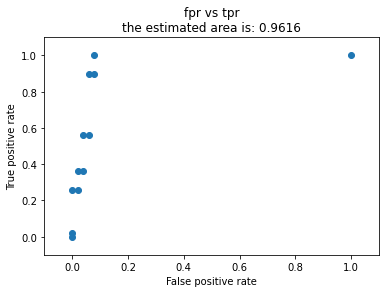

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#############################################################################
# Classification and ROC analysis
classifier = LinearDiscriminantAnalysis()

# Evaluating the classifier on the full data sample
probas_ = classifier.fit(X, y)

#This predicts the probability of each sample in X belonging to the positive class 
probas_ = classifier.predict_proba(X) 


#Compute the true positive rate (TPR), false positive rate (FPR),
#and thresholds for the ROC curve based on the predicted probabilities and the true labels y.
fpr, tpr, thresholds = roc_curve(y, probas_[:, 1])

print("fpr: " + str(fpr))
print("tpr: " + str(tpr))
print("thr: " + str(thresholds))

#Computes the area under the ROC curve (AUC) using the FPR and TPR values
area_under_the_curve = auc(fpr, tpr)

plt.scatter(fpr, tpr)
plt.xlim([-0.1, 1.1])
plt.xlabel("False positive rate")
plt.ylim([-0.1, 1.1])
plt.ylabel("True positive rate")
plt.title("fpr vs tpr\nthe estimated area is: " + str(area_under_the_curve))
plt.show()

The ``fpr`` array contains values for the False Positive Rate (FPR) at each decision threshold. Each value represents the proportion of negative instances that are incorrectly classified as positive by the classifier at a given threshold. The values in the array range from 0 to 1, with a higher value indicating a higher FPR.

The ``tpr`` array contains values for the True Positive Rate (TPR) at each decision threshold. Each value represents the proportion of positive instances that are correctly classified as positive by the classifier at a given threshold. The values in the array also range from 0 to 1, with a higher value indicating a higher TPR.

The ``thr`` array contains the decision threshold values used by the classifier at each point on the ROC curve. These values range from very high to very low, and represent the point at which the classifier changes its prediction from negative to positive. A higher threshold value corresponds to a more conservative classifier that is less likely to make false positive errors, while a lower threshold value corresponds to a more aggressive classifier that is more likely to make false positive errors.

The point at(0,0) represents a threshold that results in zero 
True Positives and zero false negatives

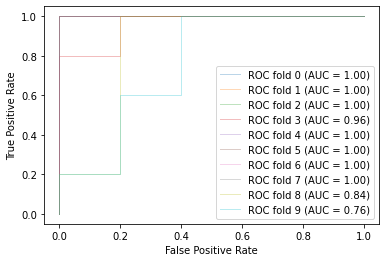

The estimated tpr for fold 0: 
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [10]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
import matplotlib.pyplot as plt

# Within a cross-validation loop
# Classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=10)   #K=10

roc_sample = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0

for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    roc_sample.append(np.interp(mean_fpr, fpr, tpr))
    # We impose the ROC curve to start from 0
    roc_sample[-1][0] = 0.0
    # Compute the area under the curve
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    # Plotting the ROC curve
    plt.plot(
        fpr, tpr, lw=1, alpha=0.3, label="ROC fold %d (AUC = %0.2f)" % (i, roc_auc)
    )
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    i += 1

plt.legend()
plt.show()

print("The estimated tpr for fold 0: ")
print(roc_sample[0])


TPR of 1.0 means that the classifier correctly identified all positive instances.

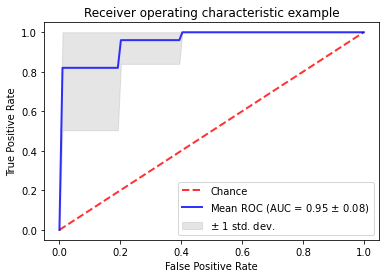

In [11]:
# Summarizing the cross-validation results

# Adding diagonal line of random classification
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

# Computing mean and std for the curves
mean_tpr = np.mean(roc_sample, axis=0)
std_tpr = np.std(roc_sample, axis=0)

# We impose the end point of the average ROC to be equal to 1
mean_tpr[-1] = 1.0

# Computing the AUC of the average curves
mean_auc = auc(mean_fpr, mean_tpr)
# Computing the std of the AUCs
std_auc = np.std(aucs)

plt.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


# Nice plot of curve with std
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


ROC graph, summarizes all the confusion matrices that each thresholds produces
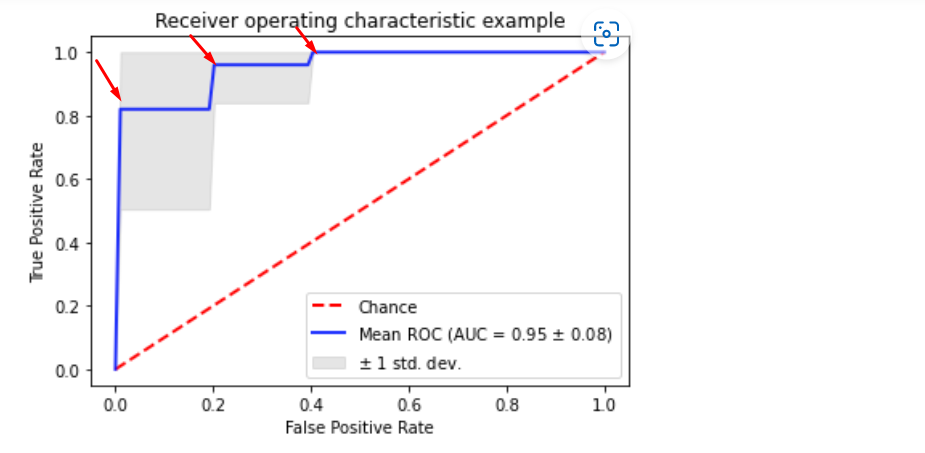
With arrow, I choose the best points

**Exercise 3.** Define the appropriate cross-validation strategy and measurement of the area under the curve for the data:

``To define the best cross-validation strategy, first we should see if our data set is balanced.``

In [13]:
X, y = make_classification(n_samples = 200, n_features=5, n_redundant=0, n_informative=3, \
                           random_state=0, n_clusters_per_class=1, weights = [0.9])


In [14]:
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=0,
    n_clusters_per_class=1,
    weights=[0.9],
)


model = LinearDiscriminantAnalysis()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=11
)
lda = model.fit(X_train, y_train)

print("*** Training ***")
print("Elements of class 0: " + str(np.sum(y_train == 0) / len(y_train)))
print("Elements of class 1: " + str(np.sum(y_train == 1) / len(y_train)))

print("*** Testing ***")
print("Elements of class 0: " + str(np.sum(y_test == 0) / len(y_test)))
print("Elements of class 1: " + str(np.sum(y_test == 1) / len(y_test)))

*** Training ***
Elements of class 0: 0.95
Elements of class 1: 0.05
*** Testing ***
Elements of class 0: 0.85
Elements of class 1: 0.15


We observe that the classes are not equally represented in training and testing data. This may pose a problem in the evaluation of the classifier, as the performance is not evaluated on the data with same distribution. For this reason, we would like to keep the proportion of classes constant across data split. This operation is called stratified k-fold

We should use StratifiedKFold

If there is unbalance in the data, for example the positive class represents 90% of the population, a classifier predicting constantly positive will lead to an accuracy of  .9
without however correctly predicting any of the samples of the negative class. This may represent a serious issue, for example in fraud detection problems, where we are interested in predicting classes which are very rare (the frauds).

In [15]:
skf = StratifiedKFold(n_splits=10)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=43, stratify=y
)
clf = model.fit(X_train, y_train)


print("Accuracy:\n    (tp + tn)/tot: " + str(clf.score(X_test, y_test)))

Accuracy:
    (tp + tn)/tot: 0.96


In this case, better metrics are the Precision and Recall:

In [16]:
from sklearn.metrics import precision_score, recall_score

print("\n *** Precision and Recall ***")

P = precision_score(clf.predict(X_test), y_test)
R = recall_score(clf.predict(X_test), y_test)

print("Precision\n    tp / (tp + fp)): " + str(P))
print("Recall\n    tp / (tp + fn): " + str(R))
print("F1: " + str(2 * P * R / (P + R)))


 *** Precision and Recall ***
Precision
    tp / (tp + fp)): 0.5
Recall
    tp / (tp + fn): 1.0
F1: 0.6666666666666666


``Investigate the right number of folds``

In [17]:
from sklearn.model_selection import train_test_split, ShuffleSplit, KFold
CV_Mean_MSE, CV_Std_MSE = [],[]
from sklearn.metrics import mean_squared_error 

# Defining training/testing pairs, each time with ratio = 5

train_sizes = np.array([5,10,15,20,25,30,35,40,50,60,70,80])
test_sizes = np.array([1,2,3,4,5,6,7,8,10,12,14,16])

# For each training size compute cross-validated errors
for s in range(len(train_sizes)):
    Test_MSE_list = []
    
    # Here ShuffleSplit will create 300 repeats with train_sizes[s] training samples and test_sizes[s] testing samples
    rs = ShuffleSplit(n_splits=300, train_size = train_sizes[s], test_size=test_sizes[s])
    rs.get_n_splits(X)
    
    for train_index, test_index in rs.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test, y_train, y_test = X[train_index],X[test_index],y[train_index], y[test_index] 

        model.fit(X_train,y_train)
    
        # Computing testing error
        Test_MSE_list.append(mean_squared_error(y_test, model.predict(X_test)))        
           
    #Calculating loop results: mean and std
    CV_Mean_MSE.append(np.mean(Test_MSE_list))
    CV_Std_MSE.append(np.std(Test_MSE_list))

#Converting to numpy for convenience
CV_Mean_MSE = np.asarray(CV_Mean_MSE)
CV_Std_MSE = np.asarray(CV_Std_MSE)

In [18]:
CV_Mean_MSE

array([0.09      , 0.08      , 0.09444444, 0.09416667, 0.07533333,
       0.07277778, 0.07761905, 0.08      , 0.06466667, 0.07416667,
       0.07047619, 0.06833333])

In [19]:
CV_Std_MSE

array([0.28618176, 0.19218047, 0.16878286, 0.14891039, 0.1168684 ,
       0.10443706, 0.10640593, 0.09217284, 0.07269724, 0.0692837 ,
       0.06388056, 0.05856205])

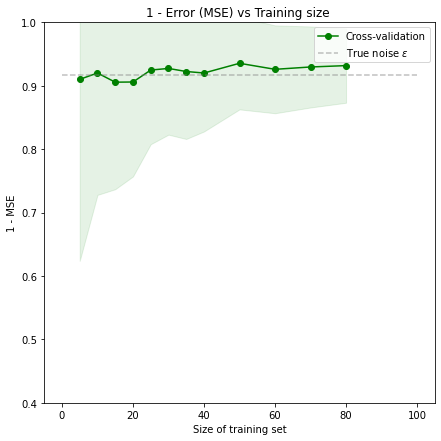

In [20]:
#Plotting
plt.figure(figsize = (7,7))
plt.fill_between(train_sizes, 1 - (CV_Mean_MSE - CV_Std_MSE),
                 1 - (CV_Mean_MSE + CV_Std_MSE), alpha=0.1, color="g")

plt.plot(train_sizes, 1 - CV_Mean_MSE, 'o-', color="g",
         label="Cross-validation")
#Plots a horizontal line at 1 - 1.0/12 with a dashed gray linestyle and transparency of 0.5, and adds 
#a label to the legend representing the true noise level.
plt.hlines(1 - 1.0/12 , 0,100, linestyle = '--', color = 'gray', alpha = .5, label = 'True noise $\epsilon$')
plt.legend(loc="best")
plt.ylim(0.4,1)
plt.ylabel('1 - MSE')
plt.xlabel('Size of training set')
plt.title('1 - Error (MSE) vs Training size ')
plt.show()

#The code generates a plot of the 1 - mean squared error (MSE) versus the size
#of the training set, along with a shaded region representing the standard deviation of the MSE.

By subtracting the MSE from 1, we get a measure of the model's accuracy, where a higher value indicates better performance.

The plot shows how the accuracy of the model varies with the size of the training set. As the size of the training set increases, the model has more data to learn from, and its accuracy improves. The plot allows us to visualize the trade-off between the amount of training data and the model's accuracy.

Like I see in the plot the highest value whe have it in the size=80

In [22]:
CV_Mean_MSE_small, CV_Var_MSE_small = [], []

k_folds_range  = np.arange(
    2,
    min(
        np.sum(y == 0),
        np.sum(y == 1),
    ),
)

for k in k_folds_range:
    #Reset list at start of loop
    i_Mean_MSE = []
    
    #Repeat experiment i times
    for i in range(300):
        #Reset list at start of loop        
        Kfold_MSE_list = []
        
        #Resample with replacement from original dataset
        rs = ShuffleSplit(n_splits=1, train_size = 40, test_size=1)
        rs.get_n_splits(X)
        for subset_index, _ in rs.split(X):
            X_subset, Y_subset, = X[subset_index], y[subset_index]
        
        #Loop over kfold splits
        kf = KFold(n_splits = k)
        for train_index, test_index in kf.split(X_subset):
            X_train, X_test = X_subset[train_index], X_subset[test_index]
            y_train, y_test = Y_subset[train_index], Y_subset[test_index]
            
            #Fit model on X_train
           
            model.fit(X_train,y_train)
            
            #Store each Kfold MSE values on X_test
            Kfold_MSE_list.append(mean_squared_error(y_test, model.predict(X_test)))
            
        #Average over the K folds for a single "i" iteration
        i_Mean_MSE.append(np.mean(Kfold_MSE_list))
    
    #Average and std for a particular k value over all i iterations
    CV_Mean_MSE_small.append(np.mean(i_Mean_MSE))
    CV_Var_MSE_small.append(np.var(i_Mean_MSE, ddof = 1))


CV_Mean_MSE_small  = np.asarray(CV_Mean_MSE_small)
CV_Var_MSE_small  = np.asarray(CV_Var_MSE_small)
CV_Std_MSE_small = np.sqrt(CV_Var_MSE_small)

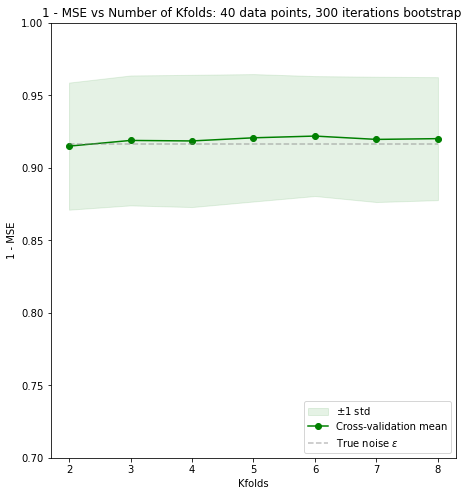

In [23]:
#Plotting result - LHS - 1 - MSE
fig = plt.figure(figsize=(16,8))
fig.add_subplot(1, 2, 1)

plt.fill_between(k_folds_range, 1 - (CV_Mean_MSE_small - CV_Std_MSE_small),
                 1 - (CV_Mean_MSE_small + CV_Std_MSE_small), alpha=0.1, color="g", label = '$\pm 1$ std')

plt.plot(k_folds_range, 1 - CV_Mean_MSE_small, 'o-', color="g",
         label="Cross-validation mean")

plt.hlines(1 - 1.0/12 , min(k_folds_range),max(k_folds_range), linestyle = '--', color = 'gray', alpha = .5, label = 'True noise $\epsilon$')
plt.legend(loc="lower right"), 
plt.ylim(0.7,1)
plt.ylabel('1 - MSE'), plt.xlabel('Kfolds')
plt.title('1 - MSE vs Number of Kfolds: 40 data points, 300 iterations bootstrap ')

plt.show()

This code is plotting a graph of 1 - mean squared error (MSE) versus the number of k-folds used in cross-validation.

The left-hand side of the graph shows the following:

The x-axis is the number of k-folds used in cross-validation.
The y-axis is 1 - MSE, which is a measure of how well the model fits the data. The closer this value is to 1, the better the fit.
The green line shows the mean 1 - MSE value for each number of k-folds.
The green shaded area around the green line shows the range between the mean minus one standard deviation and the mean plus one standard deviation.
The gray dashed line shows the true noise, which is a measure of the amount of noise in the data.


In [24]:
import pandas as pd
pd.DataFrame(data = {'K = ':k_folds_range,'Mean MSE': CV_Mean_MSE_small,'Std MSE': CV_Std_MSE_small })

,K =,Mean MSE,Std MSE
0,2,0.085000,0.043853
1,3,0.081068,0.044813
2,4,0.081417,0.045611
3,5,0.079250,0.043956
4,6,0.078056,0.041370
5,7,0.080349,0.043224
6,8,0.079833,0.042418


In general, the best value of mean squared error (MSE) is the smallest one. This indicates that the model is able to fit the data with the least amount of error.

Looking at the CV_Mean_MSE_small array, the value of 0.078056 corresponds to the lowest mean MSE of all the values. This means that the model performs best when using 6-fold cross-validation.

However, it's worth noting that the difference between the MSE values for each number of k-folds is relatively small, so the choice of the optimal value of k-folds may not have a significant impact on the overall performance of the model.

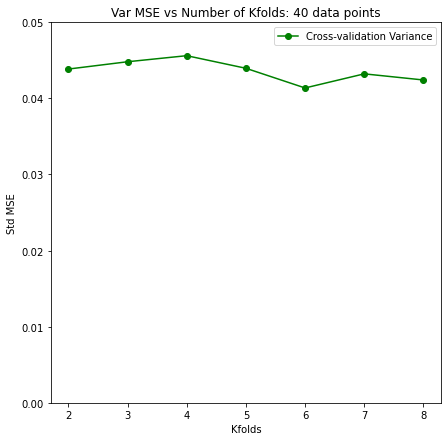

In [26]:
plt.figure(figsize = (7,7))

plt.plot(k_folds_range, CV_Std_MSE_small, 'o-', color="g",
         label="Cross-validation Variance")

plt.legend(loc="best")
plt.ylabel('Std MSE')
plt.xlabel('Kfolds')
plt.ylim(0,0.05)
plt.title('Var MSE vs Number of Kfolds: 40 data points')
plt.show()

A smaller standard deviation indicates that the MSE values for each fold are more similar and the cross-validation results are more consistent, while a larger standard deviation indicates more variability in the results.

Looking at the CV_Std_MSE_small array, we can see that the values are relatively similar across the different numbers of k-folds, ranging from around 0.04 to 0.05. This suggests that the choice of k-folds may not have a significant impact on the consistency of the cross-validation results.

Evaluating the mse and std, and taking in consideration what I explained above, I think the best choice is K=6.

## Assigments 3.2

__Exercise 1.__ During lesson we discussed the problem of _selection bias_ in cross-validation. 
This problem is nicely investigated in the paper *On the Dangers of Cross-Validation. An Experimental Evaluation*, accessible here:

http://people.csail.mit.edu/romer/papers/CrossVal_SDM08.pdf


Read  
- Section 1 (Introduction), 
- Section 4 (Experiments on Synthetic Data), 
- Section 7 (Discussion)

And write a short summary (~half a page) about these three sections (results and take home message).



``While cross-validation and leave-one-out (LOO) are common techniques utilized in both research and industry, their overuse and misuse are widespread.``

It is true that most individuals working in the field possess a certain degree/knowledge regarding the potential shortcomings associated with cross-validation. However, in situations where obtaining adequate data proves to be challenging, even the most experienced and conscientious practitioners may find themselves susceptible to the allure of CV-related techniques, despite their inherent limitations.

The researchers employed a leave-one-out cross-validation (LOOCV) approach to train and predict the performance of 𝑀 algorithms using a synthetic dataset with a known true error rate of 12. To account for variability, an average accuracy was computed across multiple trials, with different values of 𝑀. The findings revealed a positive correlation between the number of algorithms included in the analysis and the accuracy of the predictions. Specifically, the accuracy increased from 61.9% with 10 algorithms to 85.6% with 106 algorithms, despite the fact that the true error rate remained constant at 12.

The authors caution against the indiscriminate use of cross-validation (CV) and advocate for its careful application. They assert that failure to exercise caution in its use may lead to several negative consequences, including increased variance, overfitting, and consequent inefficiency in the model.


The article proposes the use of a "sequestered" test set that is only utilized after the completion of the training and validation stages. By comparing the errors obtained from the validation and test sets, researchers can determine whether they are consistent. The goal of this approach is to prevent data leakage and avoid errors such as selecting features based on the entire dataset, using correlation, before conducting the train-test split. The authors strongly advise against this methodology mistake and caution that such practices should be avoided at all costs.